In [1]:
import numpy as np 
from scipy.integrate import odeint 
# from numba import njit
# import timeit
import matplotlib.pyplot as plt

In [8]:
"""MODEL"""
def oscillatorModelOde(Y, t, can): 

    #parameters
    y = can[-1]
    

    ka1 = can[0]
    kb1 = can[1]
    kcat1 = can[2]

    ka2 = can[3]
    kb2 = can[4]

    ka3 = can[5]
    kb3 = can[6]

    ka4 = can[7]
    kb4 = can[8]

    ka7 = can[9]
    kb7 = can[10]
    kcat7 = can[11]



    #initial conditions
    L = Y[0]   
    Lp = Y[1]
    K = Y[2]
    P = Y[3]
    A = Y[4]
    LK = Y[5]
    LpA = Y[6] 
    LpAK = Y[7] 
    LpAP = Y[8] 
    LpAPLp = Y[9]
    LpAKL = Y[10] 
    LpP = Y[11] 



    dL = kb1*LK + kb1*LpAKL + kcat7*LpAPLp + kcat7*LpP - ka1*K*L - ka1*y*L*LpAK
    dLp = kcat1*LK + kb2*LpA + kcat1*LpAKL + kb7*LpAPLp + kb7*LpP - ka2*A*Lp - ka7*Lp*P - ka7*y*Lp*LpAP
    dK = kb1*LK + kcat1*LK + kb3*LpAK - ka1*K*L - ka3*K*LpA
    dP = kb4*LpAP + kb7*LpP + kcat7*LpP - ka7*Lp*P - ka4*LpA*P
    dA = kb2*LpA - ka2*A*Lp
    dLK = ka1*K*L - kb1*LK - kcat1*LK
    dLpA = kb3*LpAK + kb4*LpAP + ka2*A*Lp - kb2*LpA - ka3*K*LpA - ka4*LpA*P
    dLpAK = kb1*LpAKL + kcat1*LpAKL + ka3*K*LpA - kb3*LpAK - ka1*y*L*LpAK
    dLpAKL = ka1*y*L*LpAK - kb1*LpAKL - kcat1*LpAKL
    dLpAP = kb7*LpAPLp + kcat7*LpAPLp + ka4*LpA*P - kb4*LpAP - ka7*y*Lp*LpAP
    dLpAPLp = ka7*y*Lp*LpAP - kb7*LpAPLp - kcat7*LpAPLp
    dLpP = ka7*Lp*P - kb7*LpP - kcat7*LpP


    return([dL, dLp, dK, dP, dA, dLK, dLpA, dLpAK, dLpAP, dLpAPLp, dLpAKL, dLpP])	

In [3]:
t = np.linspace(0, 100, 10000) #integrate to 100 seconds

#INITIAL CONDITIONS
Y0_input = {'L': 0, 'Lp': 3., 'K': 0.2, 'P': 0.3, 'A': 0.6, 'LK': 0, 'LpA': 0, 'LpAK': 0, 'LpAP': 0, 'LpAPLp': 0, 'LpAKL': 0, 'LpP': 0}
Y0 = np.array([x for x in Y0_input.values()])

#PARAMETERS
param_input = {'ka1': 0.05485309578515125, 'kb1': 19.774627209108715, 'kcat1': 240.99536193310848, 'ka2': 1.0, 'kb2': 0.9504699043910143, 'ka3': 41.04322510426121, 'kb3': 192.86642772763489, 'ka4': 0.19184180144850807, 'kb4': 0.12960624157489123, 'ka7': 0.6179131289475834, 'kb7': 3.3890271820244195, 'kcat7': 4.622923709012232, 'VA': 750.}
params = np.array([x for x in param_input.values()])

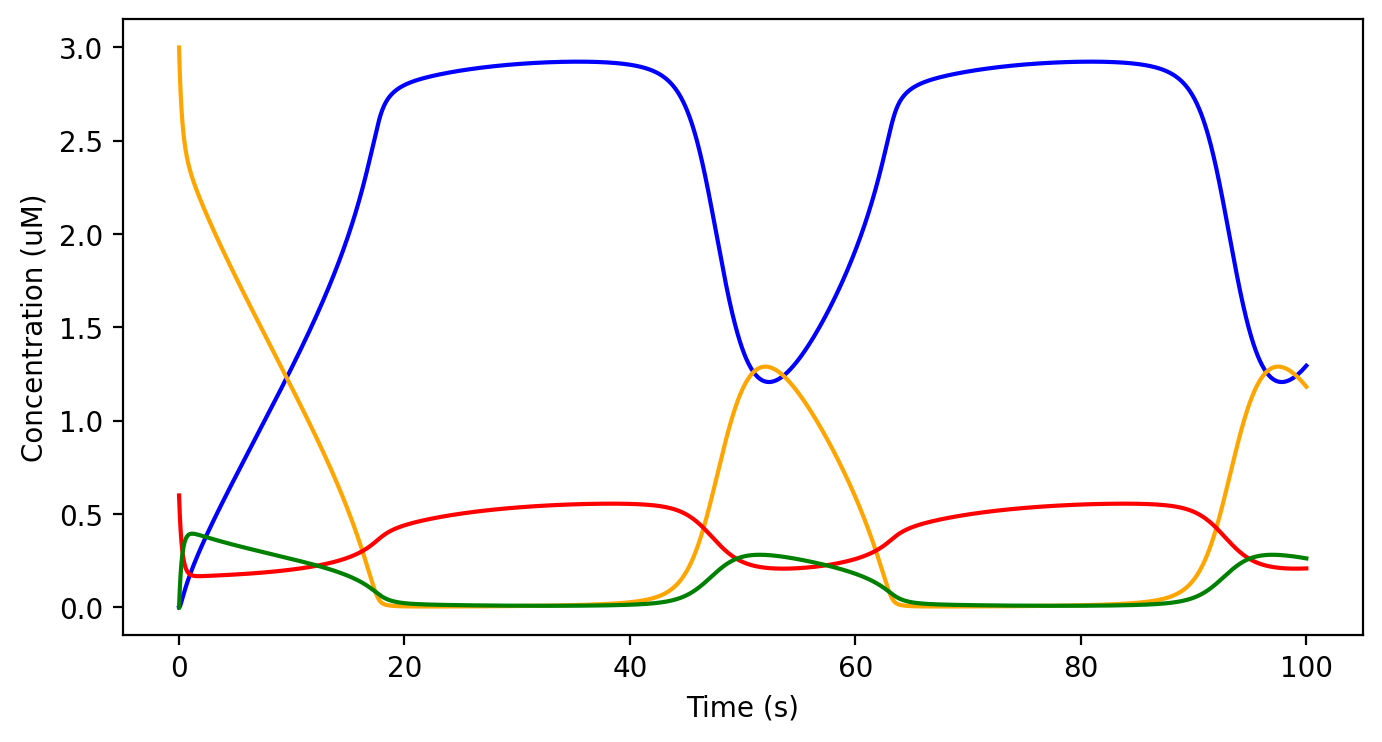

In [7]:
#SOLVE ODE
sol = odeint(oscillatorModelOde, Y0, t, args=(params,))

#PLOT
fig = plt.figure(figsize=(8,4),dpi=200)
plt.xlabel('Time (s)')
plt.ylabel('Concentration (uM)')

plt.plot(t, sol[:, 0], 'b', label='L')
plt.plot(t, sol[:, 1], 'orange', label='Lp')
plt.plot(t, sol[:, 4], 'r', label='A')
plt.plot(t, sol[:,6], color="g", label = 'LpA')
